In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

In [6]:
df_train = pd.read_csv(r'C:\Users\shrey\Downloads\new-york-city-taxi-fare-prediction\train.csv', nrows=200000, parse_dates=["pickup_datetime"])

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                200000 non-null  object             
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [8]:
df_train.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  200000.000000     200000.000000    200000.000000      199999.000000   
mean       11.342877        -72.506121        39.922326         -72.518673   
std         9.837855         11.608097        10.048947          10.724226   
min       -44.900000       -736.550000     -3116.285383       -1251.195890   
25%         6.000000        -73.992050        40.735007         -73.991295   
50%         8.500000        -73.981743        40.752761         -73.980072   
75%        12.500000        -73.967068        40.767127         -73.963508   
max       500.000000       2140.601160      1703.092772          40.851027   

       dropoff_latitude  passenger_count  
count     199999.000000    200000.000000  
mean          39.925579         1.682445  
std            6.751120         1.306730  
min        -1189.615440         0.000000  
25%           40.734092         1.000000  
50%           40.753225         1.000000  
75%           40.768070         2.000000  
max          404.616667         6.000000

In [9]:
df_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [10]:
df_train = df_train[df_train["fare_amount"] >= 0]

In [11]:
len(df_train)

199987

C:\Users\shrey\AppData\Local\Temp\ipykernel_12944\1205550497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train["fare_amount"] < 100]["fare_amount"], kde=False);


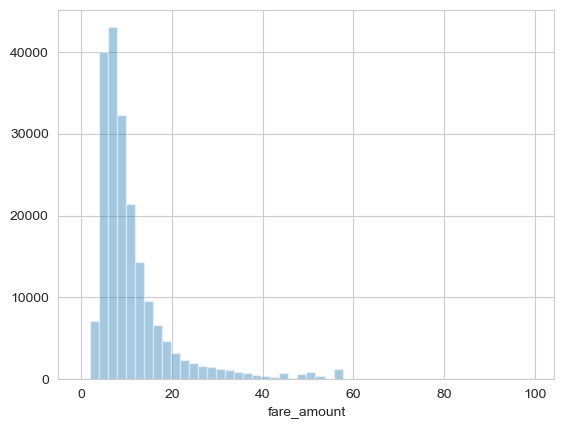

In [12]:

sns.distplot(df_train[df_train["fare_amount"] < 100]["fare_amount"], kde=False);

In [13]:
print(df_train.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [14]:
df_train = df_train.dropna(how='any', axis='rows')

In [15]:
len(df_train)

199986

In [16]:
df_test = pd.read_csv(r"C:\Users\shrey\Downloads\new-york-city-taxi-fare-prediction\test.csv")

In [17]:
df_test.head(5)

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.763805         -73.981430         40.743835                1  
1        40.719383         -73.998886         40.739201                1  
2        40.751260         -73.979654         40.746139                1  
3        40.767807         -73.990448         40.751635                1  
4        40.789775         -73.988565         40.744427                1

In [18]:
df_test.describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count       9914.000000      9914.000000        9914.000000       9914.000000   
mean         -73.974722        40.751041         -73.973657         40.751743   
std            0.042774         0.033541           0.039072          0.035435   
min          -74.252193        40.573143         -74.263242         40.568973   
25%          -73.992501        40.736125         -73.991247         40.735254   
50%          -73.982326        40.753051         -73.980015         40.754065   
75%          -73.968013        40.767113         -73.964059         40.768757   
max          -72.986532        41.709555         -72.990963         41.696683   

       passenger_count  
count      9914.000000  
mean          1.671273  
std           1.278747  
min           1.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max           6.000000

In [19]:
latitude =  40.7141667
longitude =  -74.0063889

In [20]:
print(min(df_test["pickup_longitude"].min(), df_test["dropoff_longitude"].min()))

-74.263242


In [21]:
print(max(df_test["pickup_longitude"].max(), df_test["dropoff_longitude"].max()))

-72.986532


In [22]:
print(min(df_train["pickup_longitude"].min(), df_train["dropoff_longitude"].min()))

-1251.19589


In [23]:

print(max(df_train["pickup_longitude"].max(), df_train["dropoff_longitude"].max()))

2140.60116


In [24]:
print(min(df_test["pickup_latitude"].min(), df_test["dropoff_latitude"].min()))

40.568973


In [25]:

print(max(df_test["pickup_latitude"].max(), df_test["dropoff_latitude"].max()))

41.709555


In [26]:
print(min(df_train["pickup_latitude"].min(), df_train["dropoff_latitude"].min()))

-3116.285383


In [27]:
print(max(df_train["pickup_latitude"].max(), df_train["dropoff_latitude"].max()))

1703.092772


In [28]:
def select_within_boundingbox(df, BB):
    return ((df["pickup_longitude"] >= BB[0]) & (df["pickup_longitude"] <= BB[1]) & 
            (df["pickup_latitude"] >= BB[2]) & (df["pickup_latitude"] <= BB[3]) &
            (df["dropoff_longitude"] >= BB[0]) & (df["dropoff_longitude"] <= BB[1]) &
            (df["dropoff_latitude"] >= BB[2]) & (df["dropoff_latitude"] <= BB[3]))

In [29]:
BB = (-74.3, -73.0, 40.6, 41.7)

In [30]:
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

ValueError: Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.

In [31]:
pip install folium selenium Pillow

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.4 kB 220.2 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/108.4 kB 219.4 kB/s eta 0:00:01
   ---------------------- ---------------- 61.4/108.4 kB 234.9 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 392.7 kB/s 

In [32]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [37]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Set up the Selenium WebDriver using the Service object
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Load the local file or desired URL
driver.get(f'file:///{map_file}')

# Give the map some time to fully load
driver.implicitly_wait(10)

# Close the WebDriver after use
driver.quit()


In [36]:
import folium
from selenium import webdriver
from PIL import Image
import time

# Define the coordinates of New York City
nyc_coords = [40.7128, -74.0060]

# Create a map centered around New York City
nyc_map = folium.Map(location=nyc_coords, zoom_start=12)

# Save the map to an HTML file
map_file = 'nyc_map.html'
nyc_map.save(map_file)

# Set up the Selenium WebDriver (make sure the driver path is correct)
# Here, I'm using ChromeDriver. Make sure you have it installed or use the appropriate driver.
# driver = webdriver.Chrome(executable_path=r"C:\Users\shrey\anaconda3\Lib\site-packages\webdriver_manager\drivers\__pycache__\chrome.cpython-311.pyc")  # e.g., "C:/path/to/chromedriver.exe"
driver = webdriver.Chrome(executable_path="C:\\Users\\shrey\\anaconda3\\Lib\\site-packages\\webdriver_manager\\drivers\\__pycache__\\chrome.cpython-311.pyc")

driver.get(f'file:///{map_file}')

# Give the map some time to fully load
time.sleep(5)

# Save the screenshot of the entire webpage
driver.save_screenshot("nyc_map.png")

# Close the browser
driver.quit()

# Optional: Crop the image to just the map using Pillow
img = Image.open("nyc_map.png")

# Define the coordinates for cropping (you may need to adjust these values)
left = 10
top = 10
right = img.width - 10
bottom = img.height - 10
cropped_img = img.crop((left, top, right, bottom))

# Save the cropped image
cropped_img.save("nyc_map_cropped.png")

# Display the final image
cropped_img.show()

TypeError: WebDriver.__init__() got an unexpected keyword argument 'executable_path'

In [38]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import folium

# Create a sample map using folium (optional part based on your context)
map_file = 'nyc_map.html'
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
nyc_map.save(map_file)

# Set up the Selenium WebDriver using the Service object
# ChromeDriverManager installs the correct version of the ChromeDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Load the local file or desired URL
driver.get(f'file:///{map_file}')

# Give the map some time to fully load
driver.implicitly_wait(10)

# You can perform further actions with the driver here

# Close the WebDriver after use
driver.quit()


In [39]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import folium
import time

# Create a sample map using Folium
map_file = 'nyc_map.html'
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
nyc_map.save(map_file)

# Set up the Selenium WebDriver using the Service object
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Load the local HTML file into the browser
driver.get(f'file:///{map_file}')

# Give the map some time to fully load
time.sleep(5)  # Adjust the sleep time if needed

# Save the screenshot of the map
png_file = 'nyc_map.png'
driver.save_screenshot(png_file)

# Close the WebDriver after use
driver.quit()

print(f"Map saved as PNG: {png_file}")


Map saved as PNG: nyc_map.png


In [46]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import folium
import time
import os

# Create a sample map using Folium
map_file = 'nyc_map.html'
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
nyc_map.save(map_file)

# Set up the Selenium WebDriver using the Service object
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Load the local HTML file into the browser
driver.get(f'file:///{os.path.abspath(map_file)}')

# Give the map some time to fully load
time.sleep(5)  # Adjust the sleep time if needed

# Define the file name and path for the PNG file
png_file = 'nyc_map.png'

# Save the screenshot of the map
driver.save_screenshot(png_file)

# Close the WebDriver after use
driver.quit()

# Verify if the file has been saved and is accessible
if os.path.exists(png_file):
    print(f"Map successfully saved as PNG: {png_file}")
else:
    print("Failed to save the map as a PNG file.")


Map successfully saved as PNG: nyc_map.png


In [53]:
nyc_map = plt.imread("C://Users//shrey//Downloads//nyc_map (1).png")


In [54]:

df_train = df_train[select_within_boundingbox(df_train, BB)]

In [55]:
print("New size {}".format(len(df_train)))

New size 195612


In [56]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1,2,figsize=(16, 10))
    axs[0].scatter(df["pickup_longitude"], df["pickup_latitude"], alpha = alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup Locations')
    axs[0].imshow(nyc_map, extent=BB)
    
    axs[1].scatter(df["dropoff_longitude"], df["dropoff_latitude"] , alpha = alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff Locations')
    axs[1].imshow(nyc_map, extent=BB)

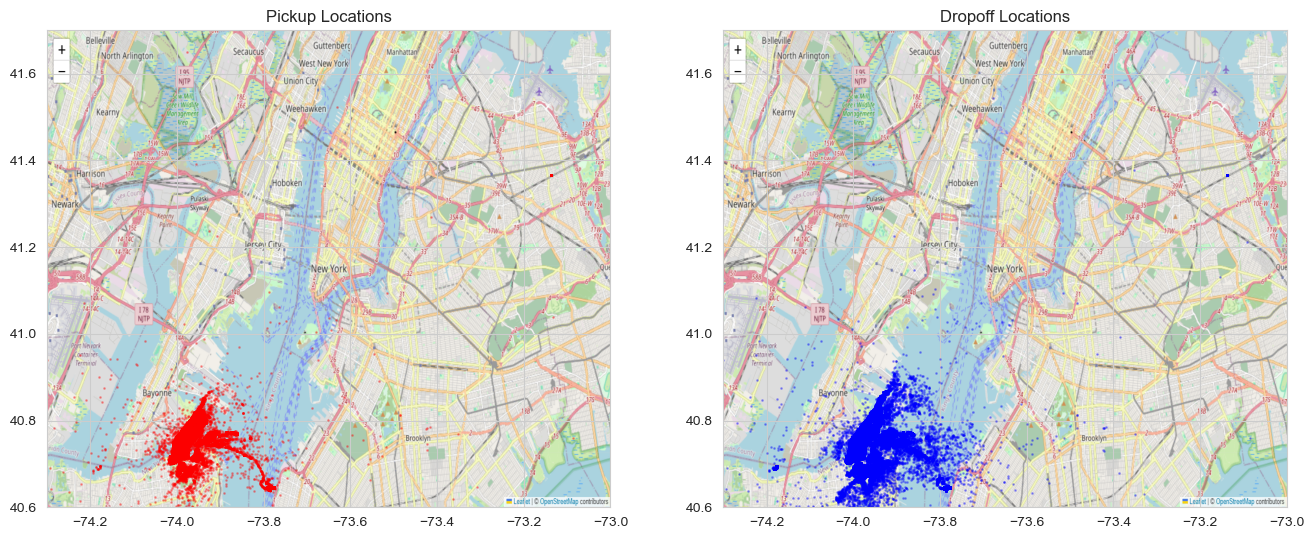

In [57]:
plot_on_map(df_train, BB, nyc_map, s=1, alpha=0.3)

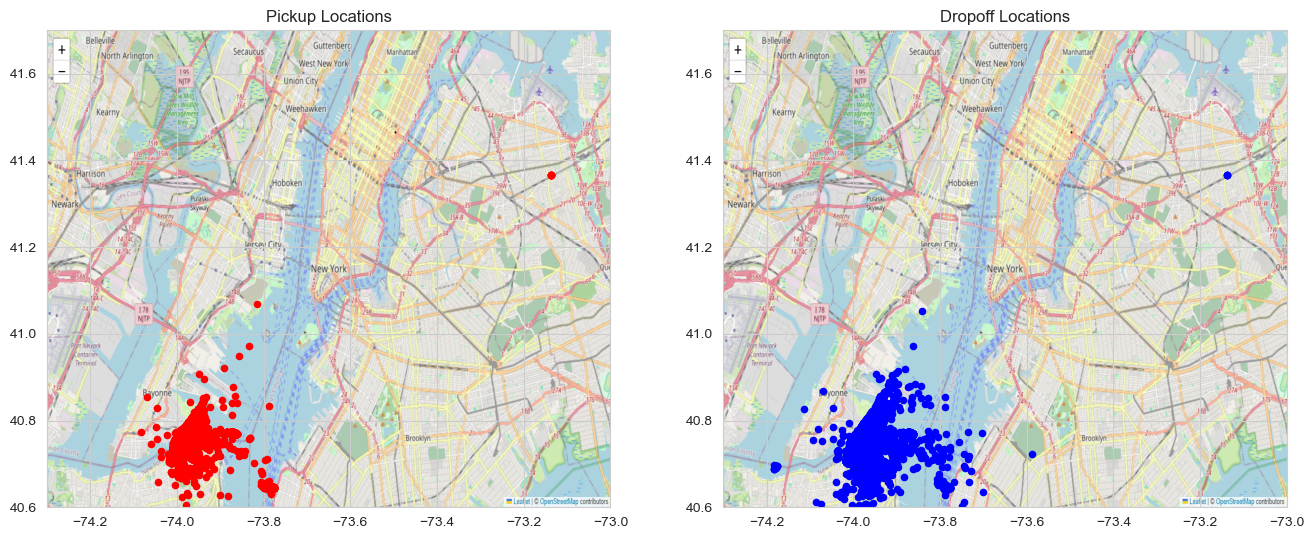

In [58]:
plot_on_map(df_test, BB, nyc_map, alpha=1.0, s=20)

In [59]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)

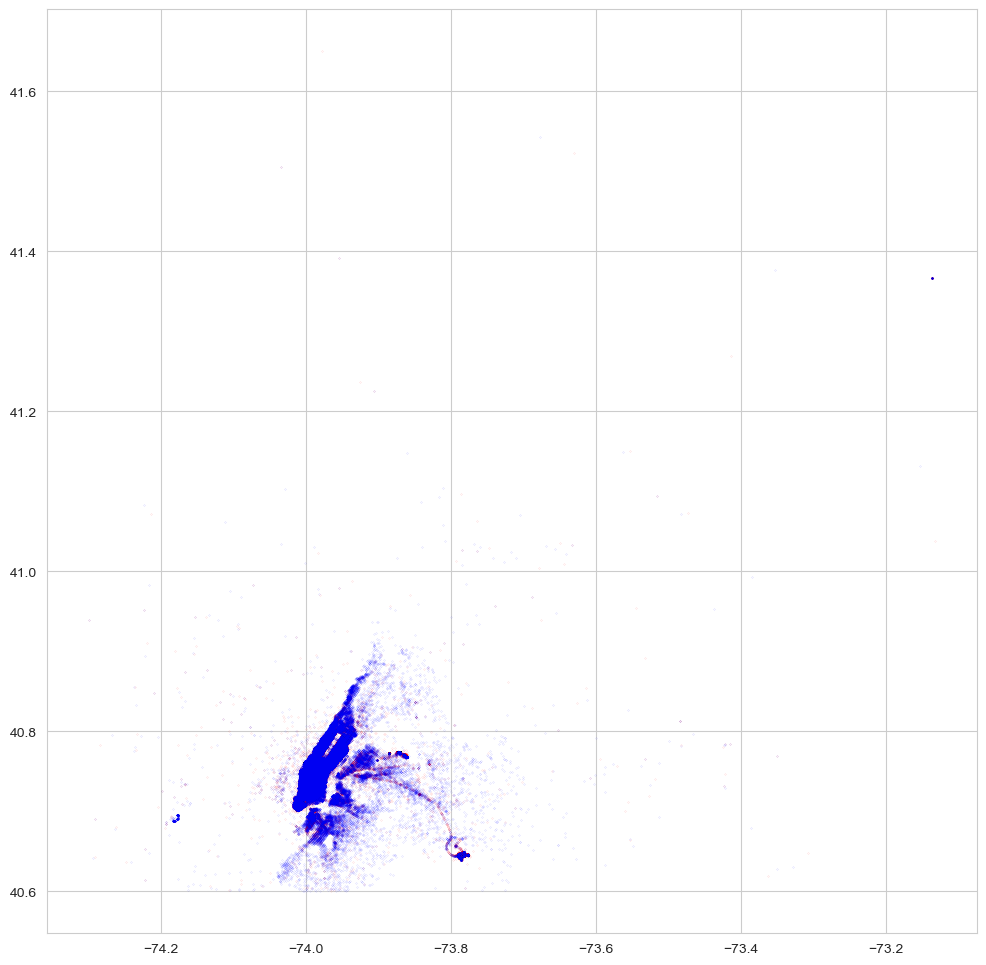

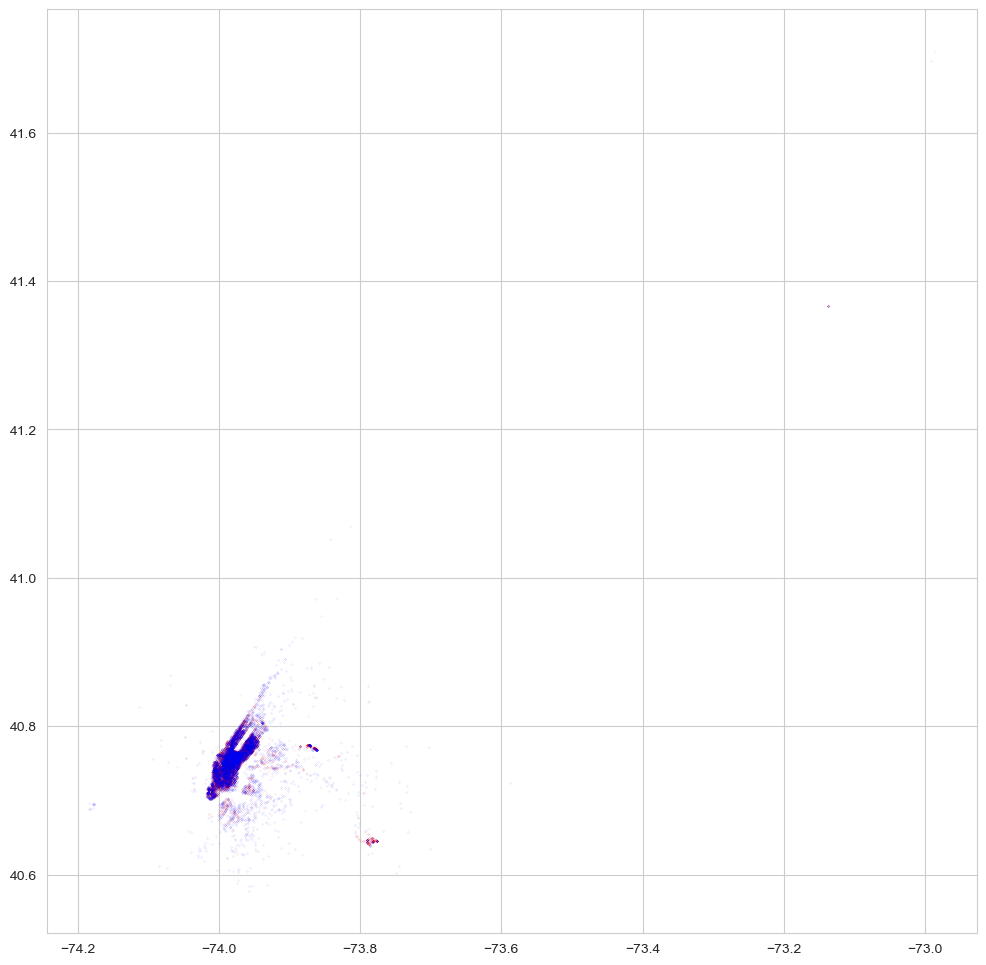

In [60]:
plot_hires(df_train, (-74.3, -73.1, 40.6, 41.65))
plot_hires(df_test, (-74.26, -72.98, 40.57, 41.71))

In [61]:
# add time information
df_train['year'] = df_train["pickup_datetime"].apply(lambda t: t.year)
df_train['weekday'] = df_train["pickup_datetime"].apply(lambda t: t.weekday())
df_train['hour'] = df_train["pickup_datetime"].apply(lambda t: t.hour)

In [62]:

def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [63]:
df_train["distance_miles"] = distance(df_train["pickup_latitude"], df_train["pickup_longitude"], 
                                      df_train["dropoff_latitude"], df_train["dropoff_longitude"])

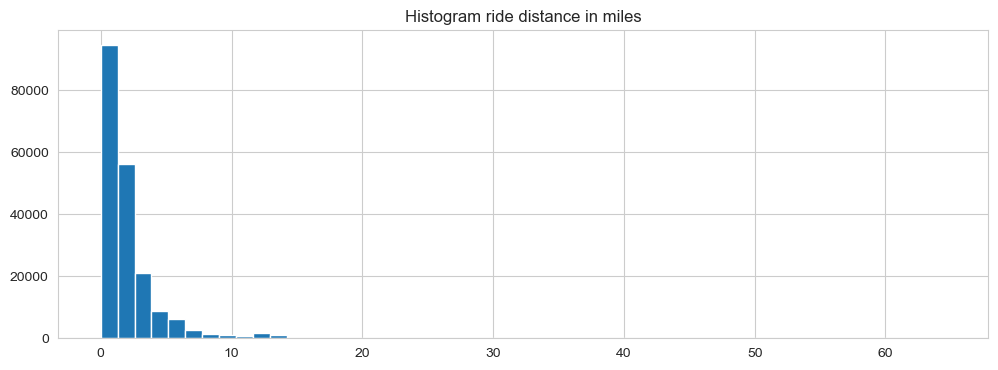

In [64]:
df_train["distance_miles"].hist(bins=50, figsize=(12,4))
plt.title("Histogram ride distance in miles");


In [65]:
df_train["distance_miles"].describe()

count    195612.000000
mean          2.063410
std           2.352008
min           0.000000
25%           0.780419
50%           1.337858
75%           2.423327
max          64.644331
Name: distance_miles, dtype: float64

In [67]:
df_train.groupby('passenger_count')[['distance_miles', 'fare_amount']].mean()


distance_miles  fare_amount
passenger_count                             
0                      1.836291     9.080659
1                      2.035126    11.169553
2                      2.174035    11.786048
3                      2.070869    11.332867
4                      2.126675    11.680824
5                      2.066121    11.172870
6                      2.168814    12.354238

Text(0.5, 1.0, 'Zoom in on distance < 15 mile and fare < $100')

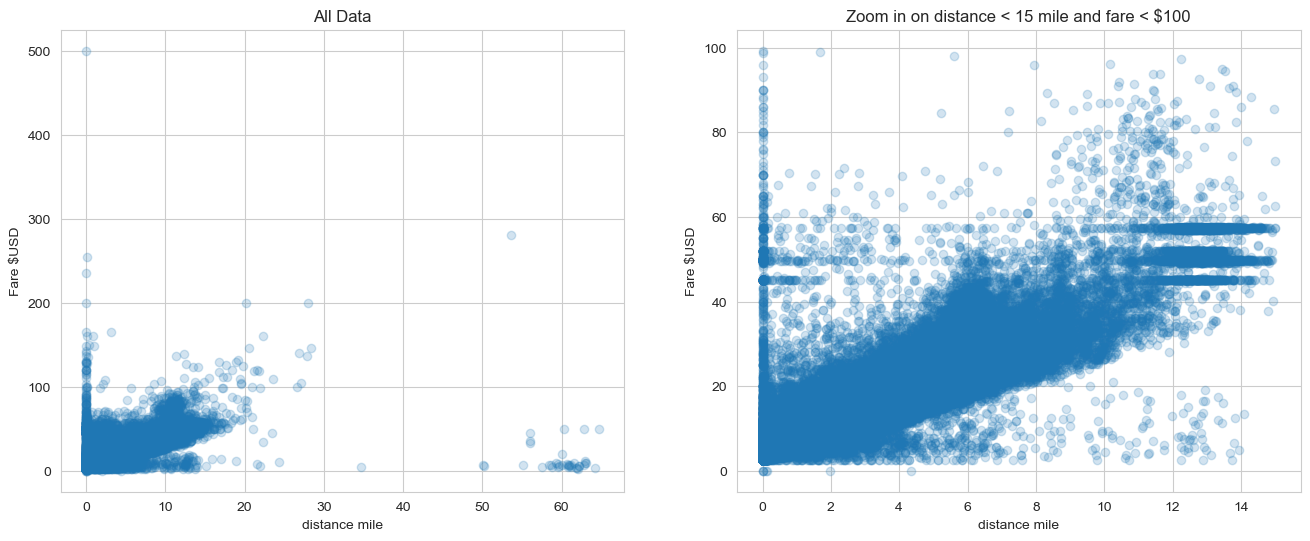

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(df_train["distance_miles"], df_train["fare_amount"], alpha=0.2)
axs[0].set_xlabel("distance mile")
axs[0].set_ylabel("Fare $USD")
axs[0].set_title("All Data")

# Zoom-in some part of the data
idx = ((df_train['distance_miles'] < 15) & (df_train["fare_amount"] < 100))
axs[1].scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_amount"], alpha=0.2)
axs[1].set_xlabel("distance mile")
axs[1].set_ylabel("Fare $USD")
axs[1].set_title("Zoom in on distance < 15 mile and fare < $100")

In [69]:
# remove datapoints with distance <0.05 miles
idx = (df_train["distance_miles"] >= 0.05)
print('Old size: %d' % len(df_train))
df_train = df_train[idx]
print('New size: %d' % len(df_train))

Old size: 195612
New size: 192447


In [70]:

jfk = (-73.7822222222,40.6441666667)
nyc = (-74.0063889, 40.7141667)

In [71]:
def plot_location_fare(loc, name, range=1.5):
    # select all datapoints with dropoff location within range of airport
    fig, axs = plt.subplots(1,2, figsize=(14,5))
    idx = (distance(df_train["pickup_latitude"], df_train["pickup_longitude"], loc[1], loc[0]) < range)
    df_train[idx]["fare_amount"].hist(bins = 100, ax=axs[0])
    axs[0].set_xlabel("Fare $USD")
    axs[0].set_title("Histogram pickup location within {} miles of {}".format(range, name))
    
    idx = (distance(df_train["dropoff_latitude"], df_train["dropoff_longitude"], loc[1], loc[0]) < range)
    df_train[idx]["fare_amount"].hist(bins=100, ax=axs[1])
    axs[1].set_xlabel("Fare $USD")
    axs[1].set_title("Histogram dropoff location within {} miles of {}".format(range, name))

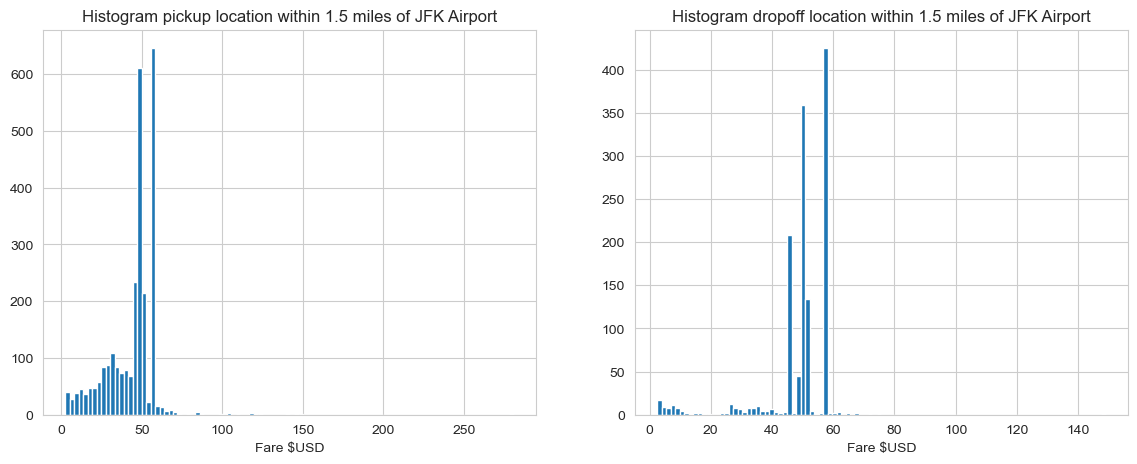

In [72]:
plot_location_fare(jfk, 'JFK Airport')

In [73]:
#Other Airports
ewr = (-74.175, 40.69) #Newark Liberty International Airport https://www.travelmath.com/airport/EWR
lgr = (-73.87, 40.77) #Laguardia Airport, https://www.travelmath.com/airport/LGA

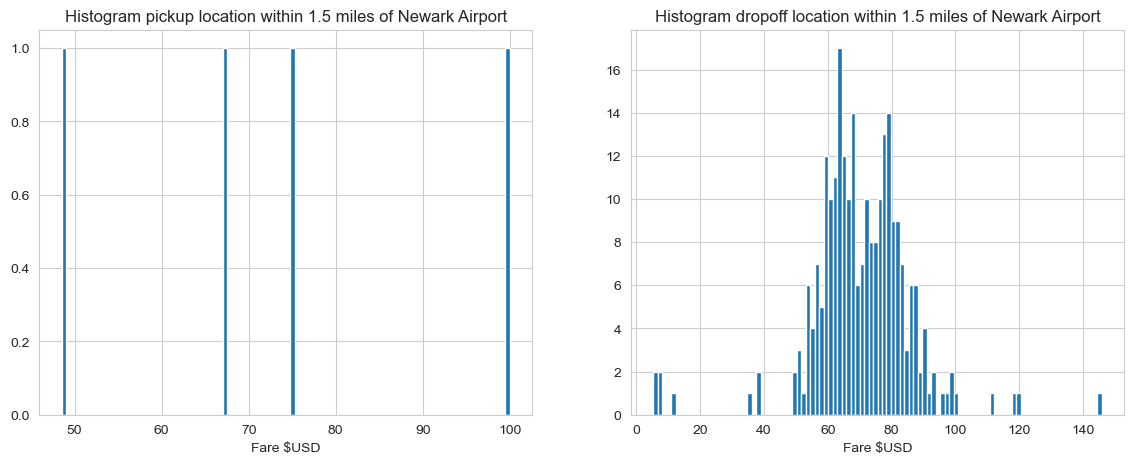

In [74]:

plot_location_fare(ewr, 'Newark Airport')

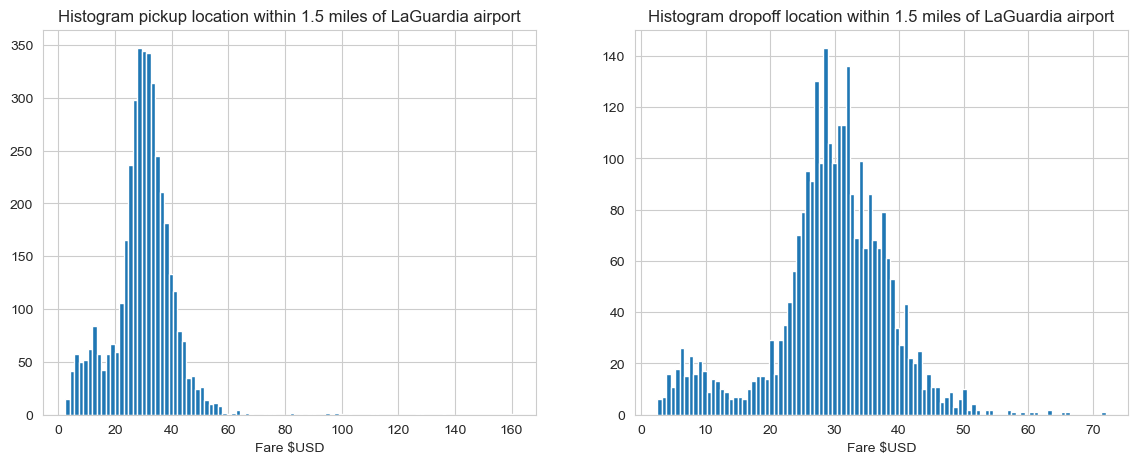

In [75]:

plot_location_fare(lgr, 'LaGuardia airport')

In [76]:

df_train["fare_per_mile"] = df_train["fare_amount"] / df_train["distance_miles"]

C:\Users\shrey\AppData\Local\Temp\ipykernel_12944\3741448805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["fare_per_mile"] = df_train["fare_amount"] / df_train["distance_miles"]


In [77]:
df_train["fare_per_mile"].describe()

count    192447.000000
mean          7.404693
std          15.918010
min           0.000000
25%           4.771146
50%           6.137379
75%           8.072801
max        3812.571628
Name: fare_per_mile, dtype: float64

Text(0, 0.5, 'fare per distance in mile')

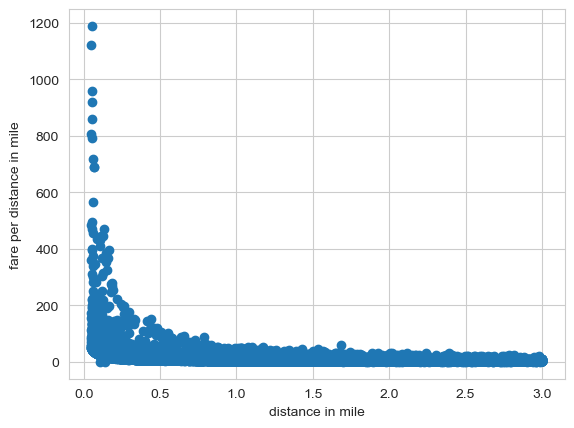

In [78]:

idx = (df_train["distance_miles"] < 3) & (df_train["fare_amount"] < 100)
plt.scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_per_mile"])
plt.xlabel("distance in mile")
plt.ylabel("fare per distance in mile")

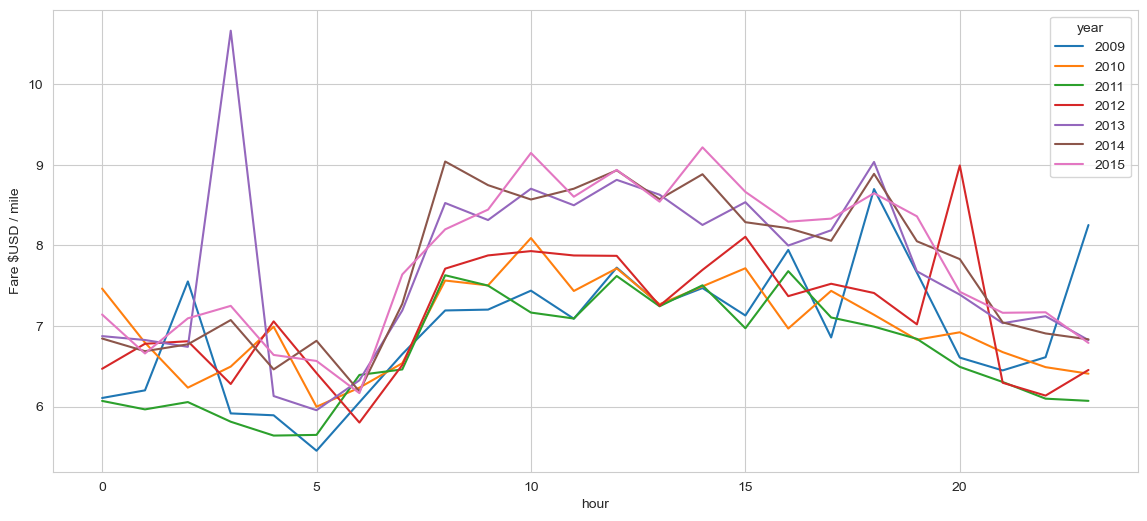

In [79]:
df_train.pivot_table("fare_per_mile", index="hour", columns="year").plot(figsize=(14,6))
plt.ylabel("Fare $USD / mile");

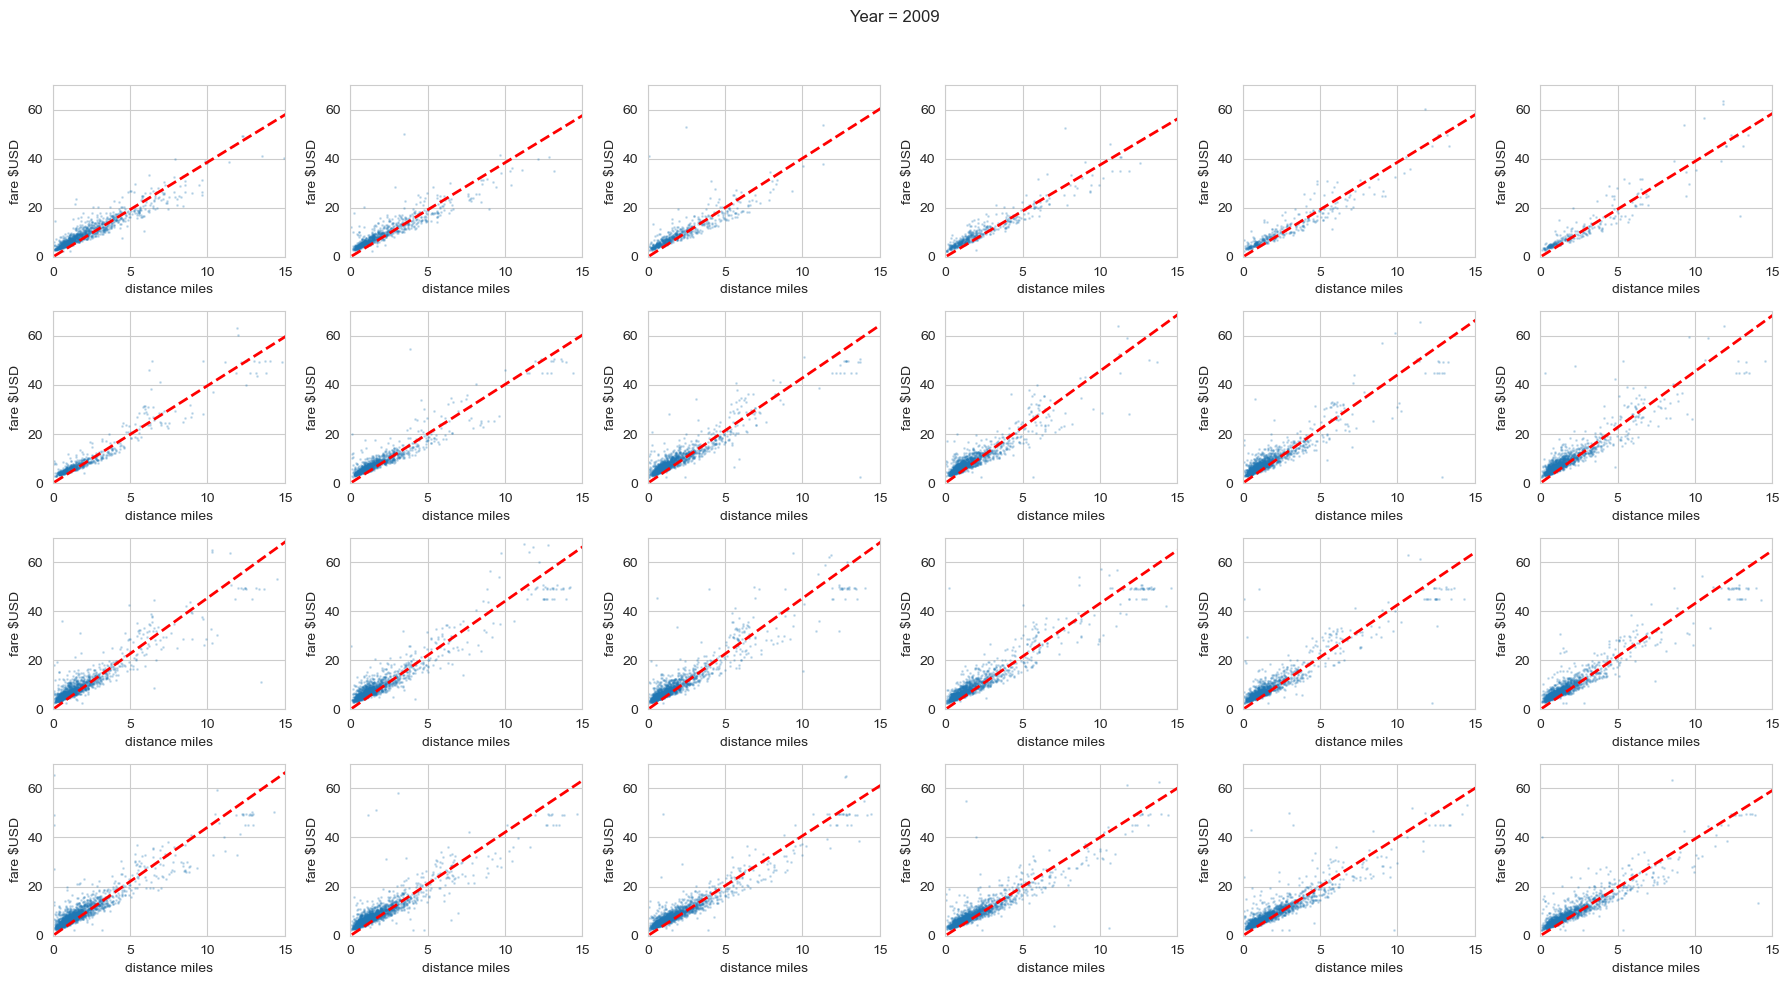

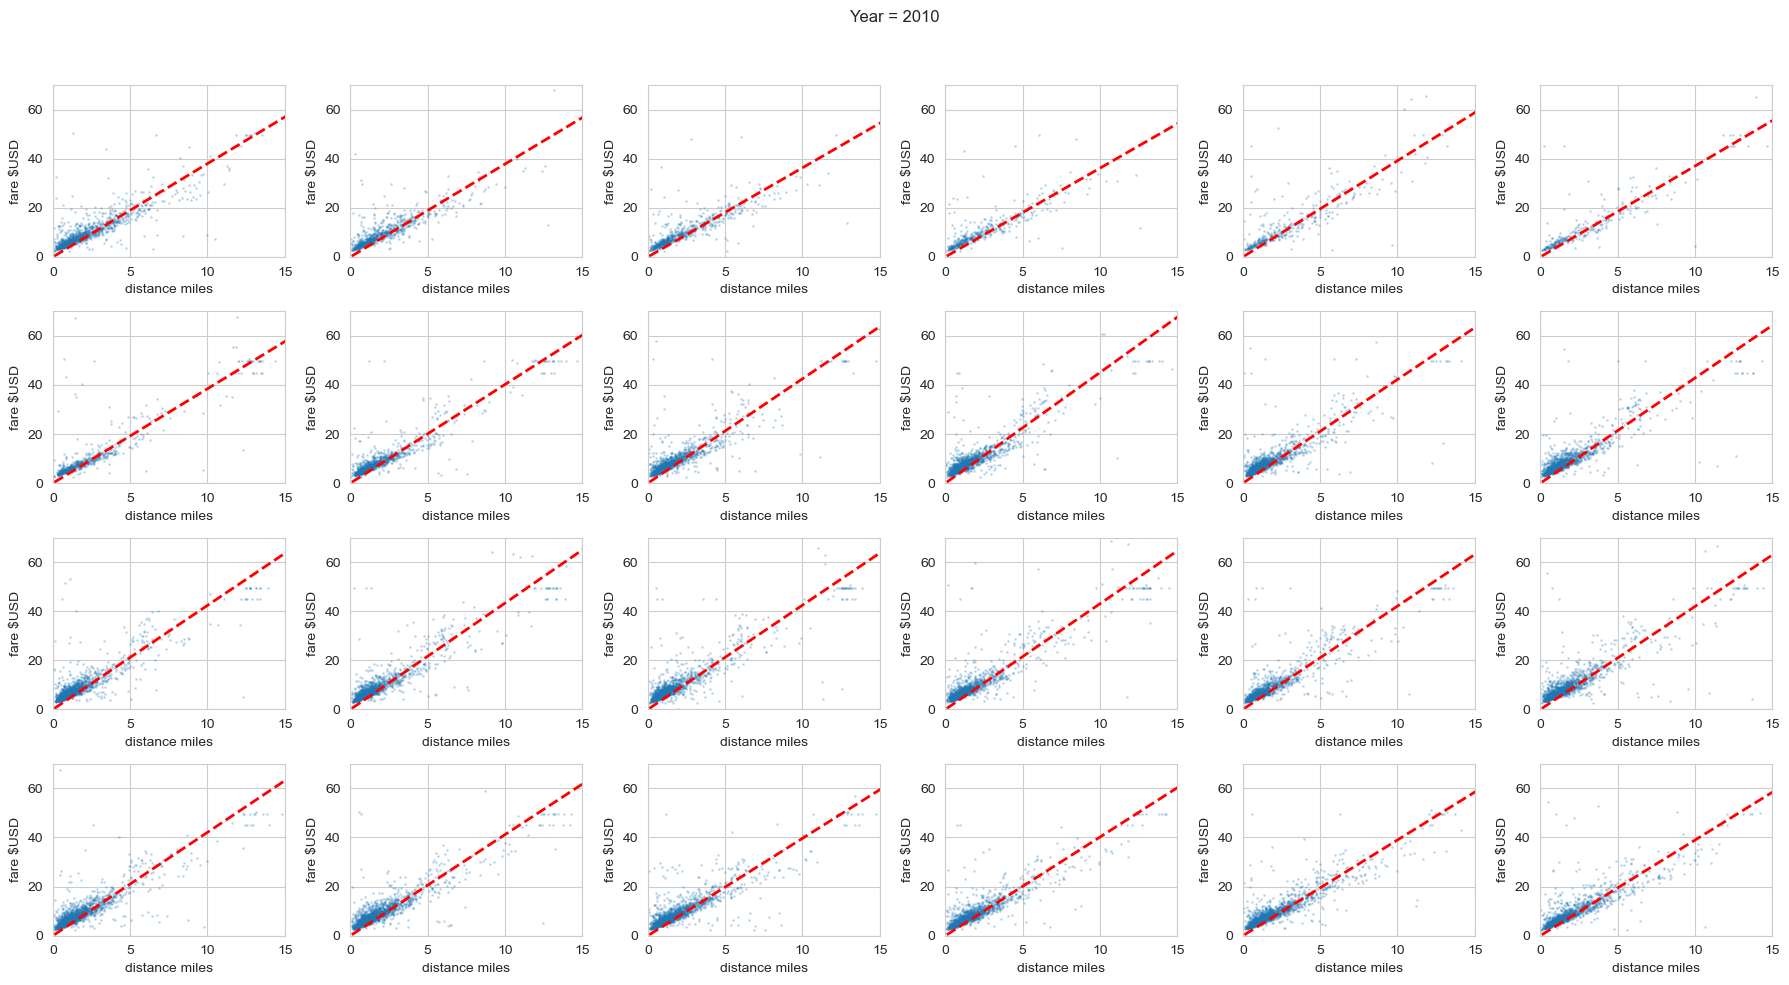

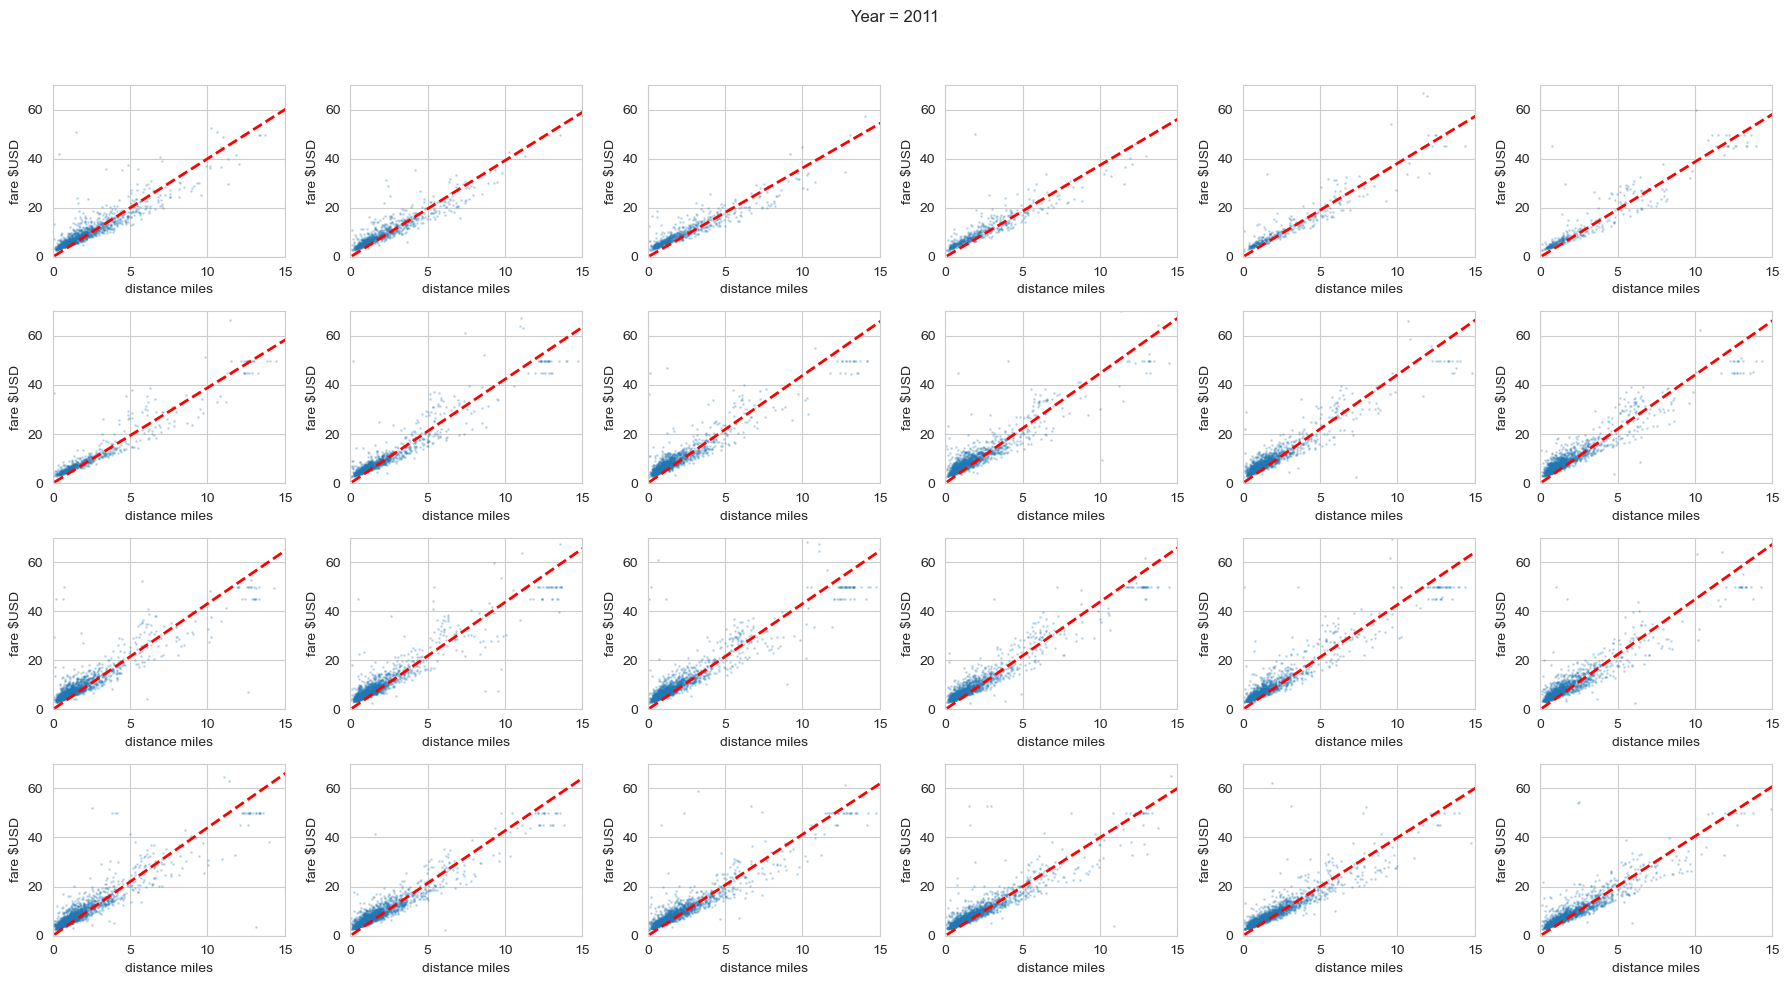

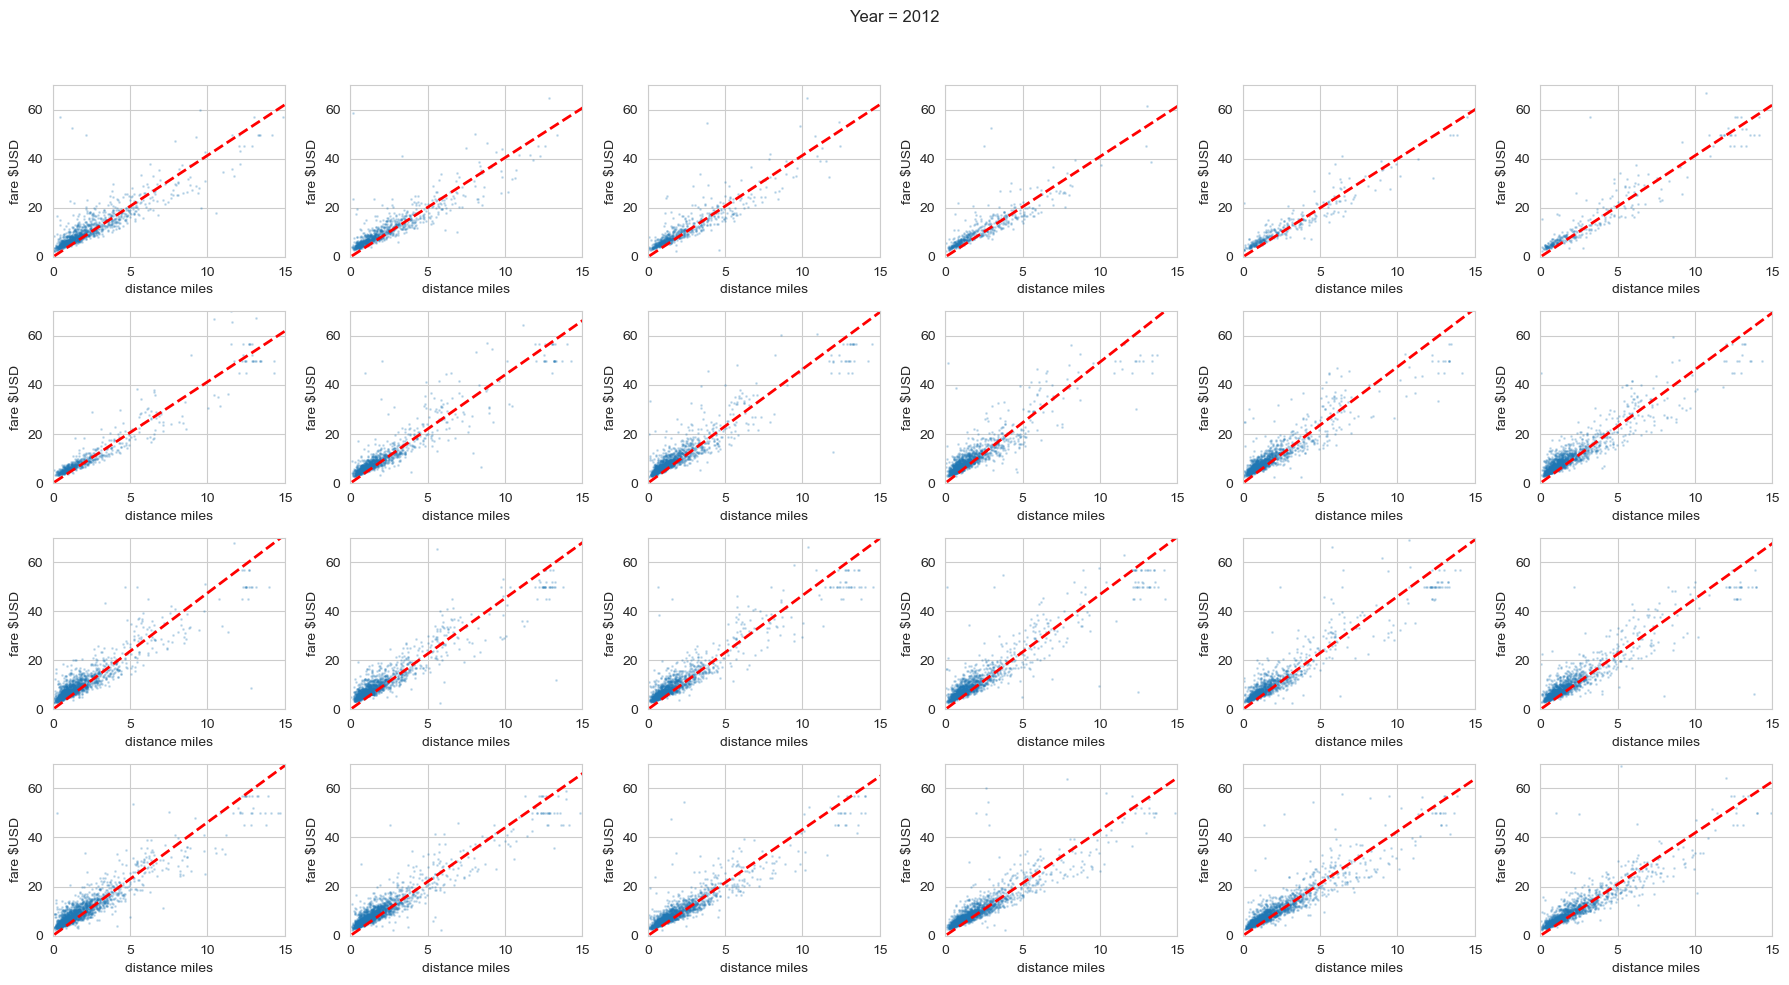

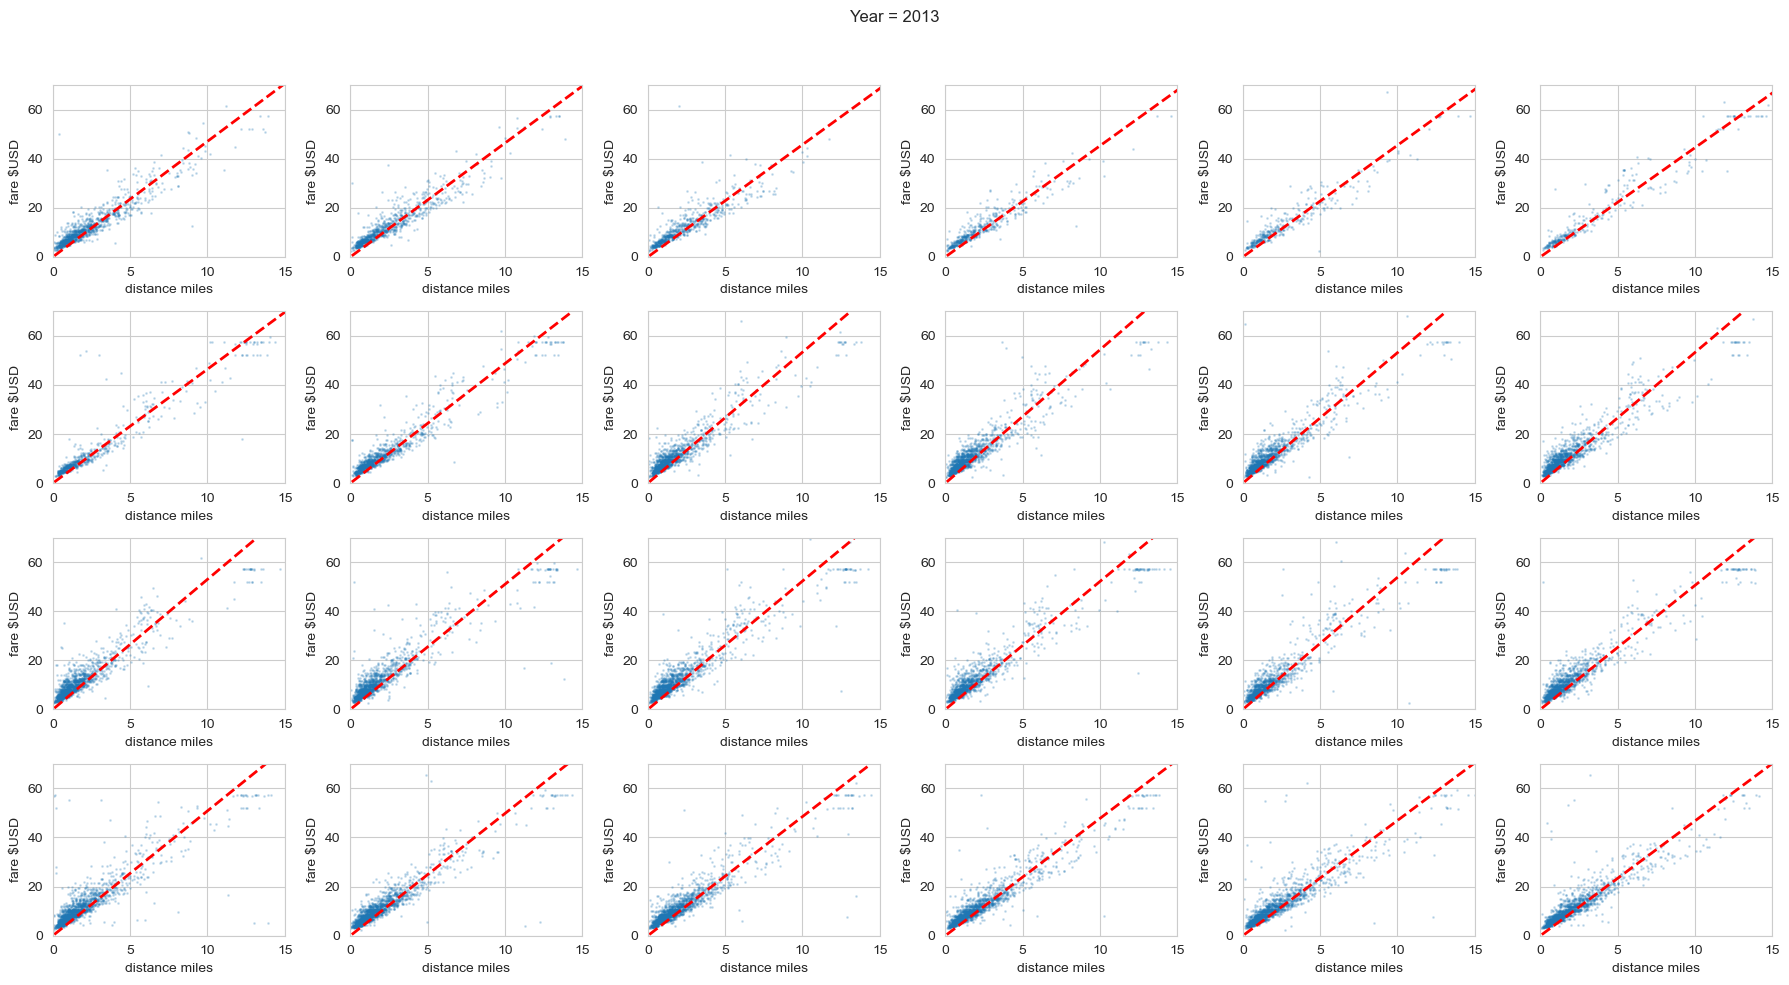

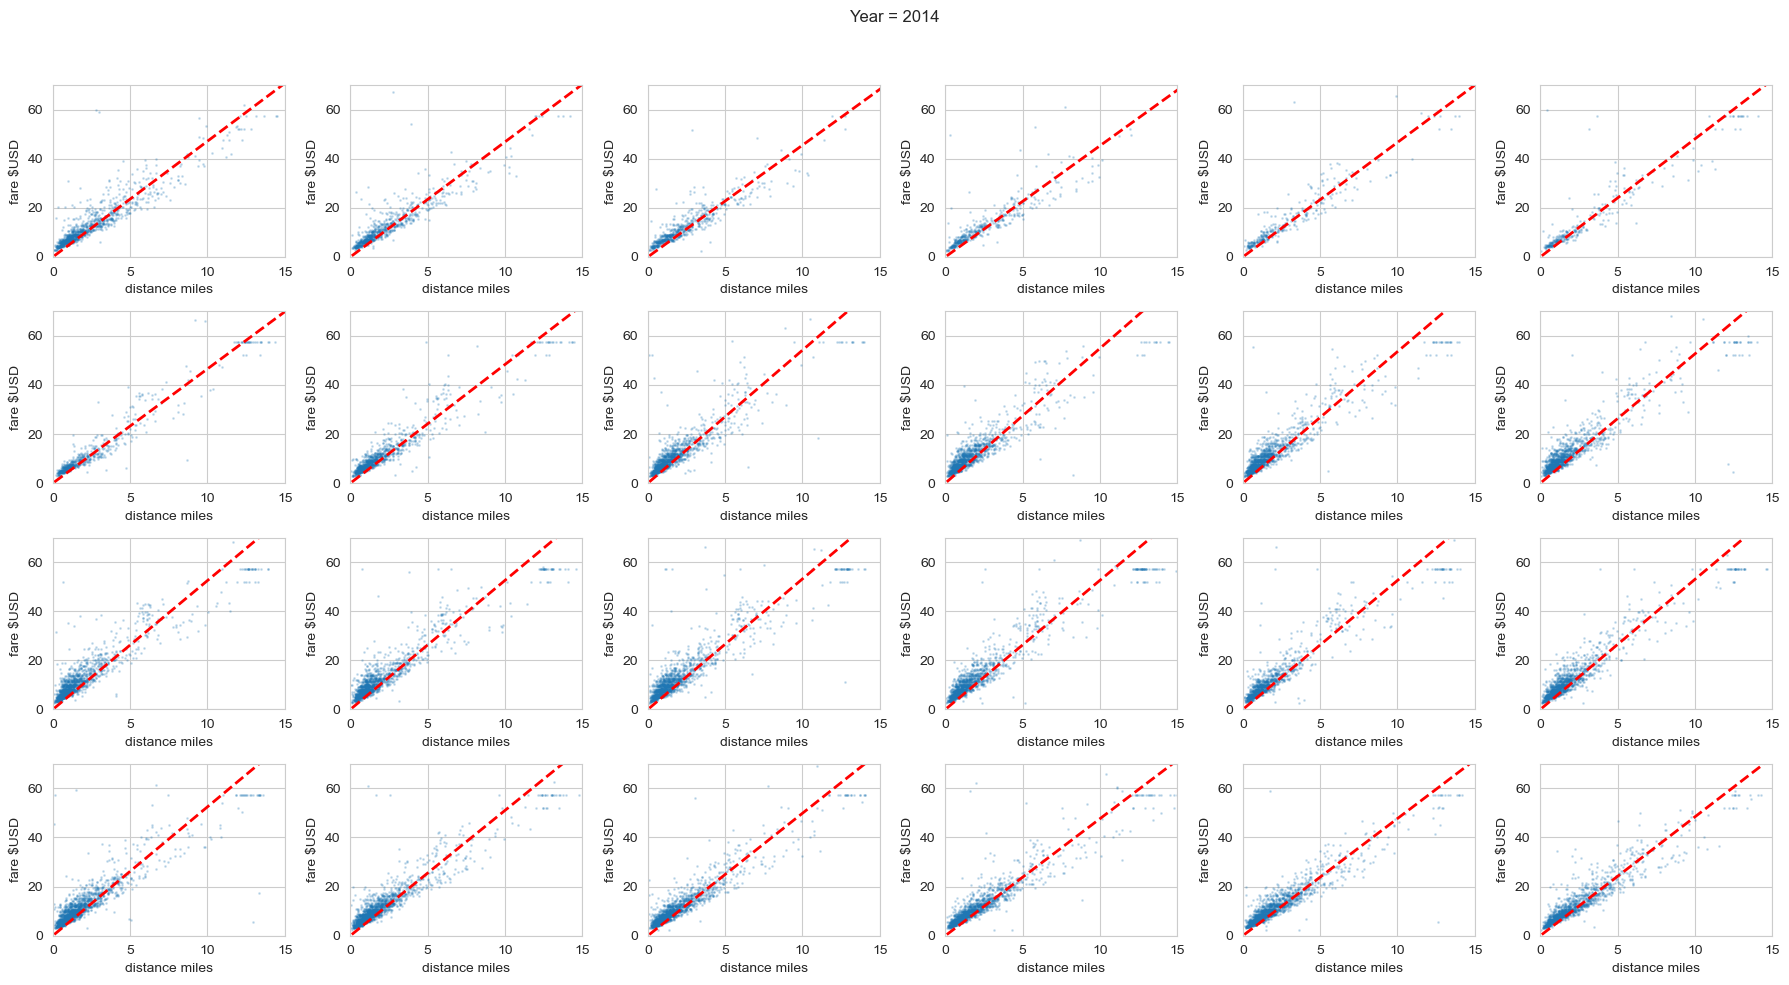

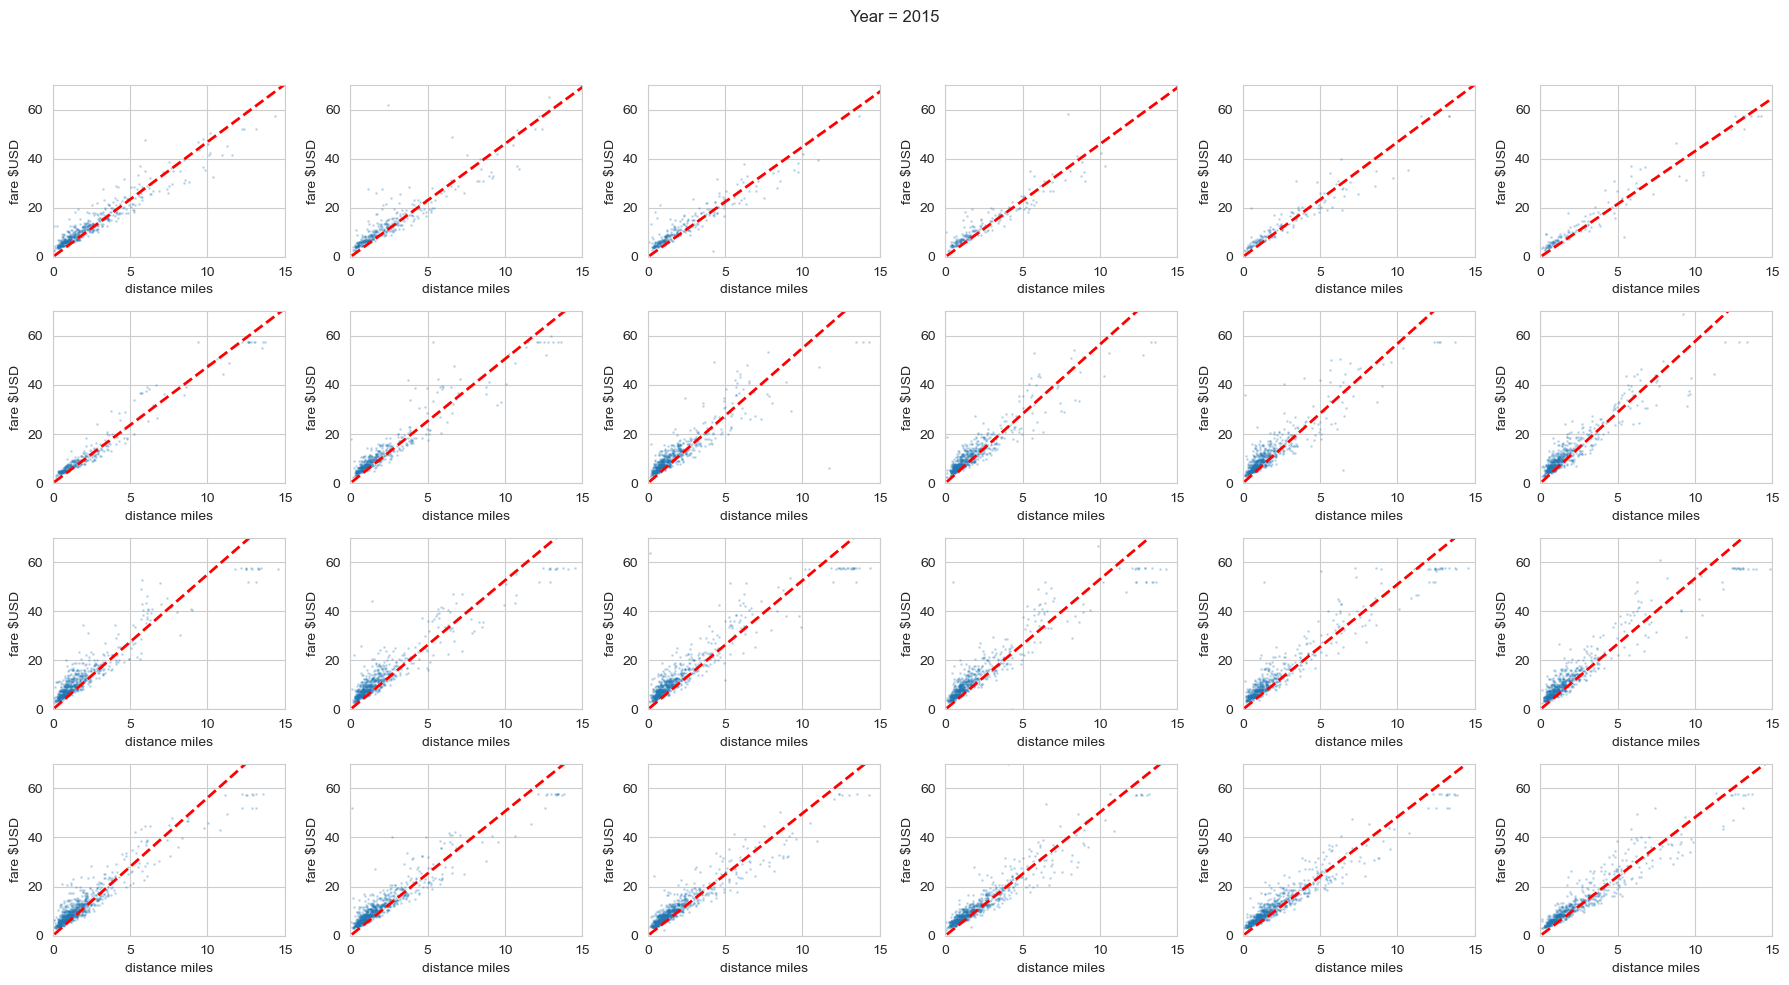

In [80]:
from sklearn.linear_model import LinearRegression

# plot all years
for year in df_train["year"].unique():
    
    # create figure
    fig, axs = plt.subplots(4, 6, figsize=(18, 10))
    axs = axs.ravel()
    
    # plot for all hours
    
    for h in range(24):
        idx = (df_train["distance_miles"] < 15) & (df_train["fare_amount"] < 100) & (df_train["hour"] == h) & \
              (df_train["year"] == year)
        axs[h].scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_amount"], alpha=0.2, s=1)
        axs[h].set_xlabel('distance miles')
        axs[h].set_ylabel('fare $USD')
        axs[h].set_xlim((0, 15))
        axs[h].set_ylim((0, 70))
        
        model = LinearRegression(fit_intercept=False)
        
        X, y = df_train[idx]["distance_miles"].values.reshape(-1,1), df_train[idx]["fare_amount"].values
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.predict(xx.reshape(-1,1)), '--', c='r', lw=2)
        
    plt.suptitle("Year = {}".format(year))
    plt.tight_layout(rect=[0, 0, 1, 0.95]);

In [81]:
df_train["delta_lon"] = df_train["pickup_longitude"] - df_train["dropoff_longitude"]
df_train["delta_lat"] = df_train["pickup_latitude"] - df_train["dropoff_latitude"]

C:\Users\shrey\AppData\Local\Temp\ipykernel_12944\4288556868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["delta_lon"] = df_train["pickup_longitude"] - df_train["dropoff_longitude"]
C:\Users\shrey\AppData\Local\Temp\ipykernel_12944\4288556868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["delta_lat"] = df_train["pickup_latitude"] - df_train["dropoff_latitude"]


### Select trips in Manhattan

In [82]:
BB_manhattan = (-74.025, -73.925, 40.7, 40.8)
idx_manhattan = select_within_boundingbox(df_train, BB_manhattan)

Text(0.5, 1.0, 'log1p(fare_amount)')

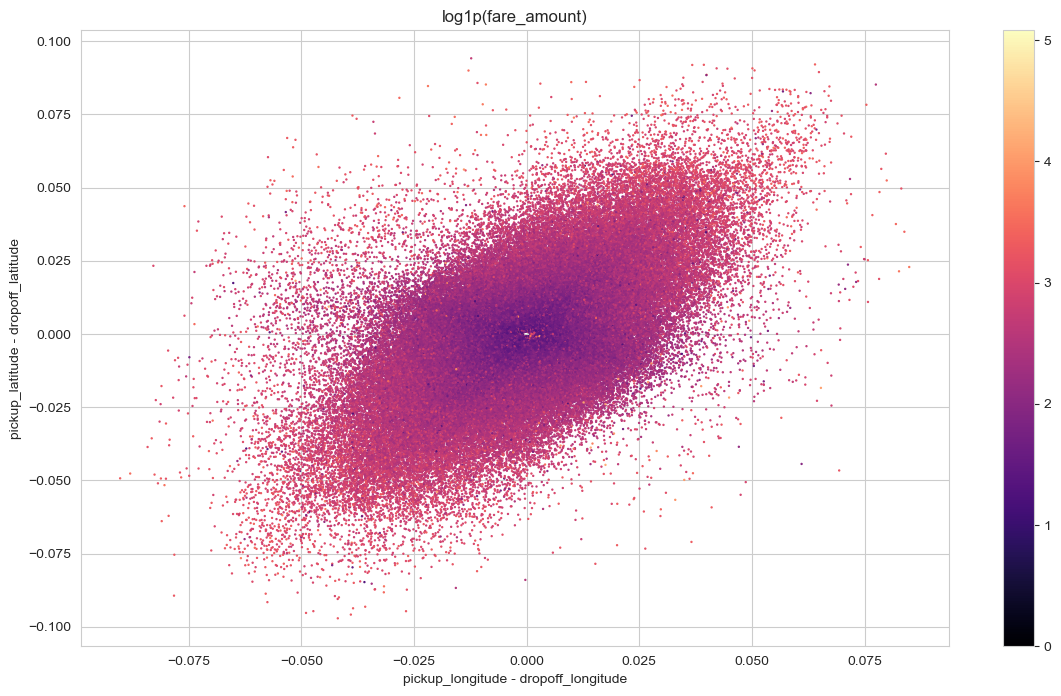

In [83]:
plt.figure(figsize=(14,8))
plt.scatter(df_train[idx_manhattan]["delta_lon"], df_train[idx_manhattan]["delta_lat"], s=0.5, alpha=1.0,
            c=np.log1p(df_train[idx_manhattan]["fare_amount"]), cmap="magma")
plt.colorbar()
plt.xlabel('pickup_longitude - dropoff_longitude')
plt.ylabel('pickup_latitude - dropoff_latitude')
plt.title('log1p(fare_amount)')

Looks like direction of the trip seems to matter. Direction of a trip, from 180 to -180 degrees. Horizontal axes = 0 degrees

In [84]:
def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

In [85]:
df_train['direction'] = calculate_direction(df_train.delta_lon, df_train.delta_lat)

C:\Users\shrey\AppData\Local\Temp\ipykernel_12944\1723632080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['direction'] = calculate_direction(df_train.delta_lon, df_train.delta_lat)


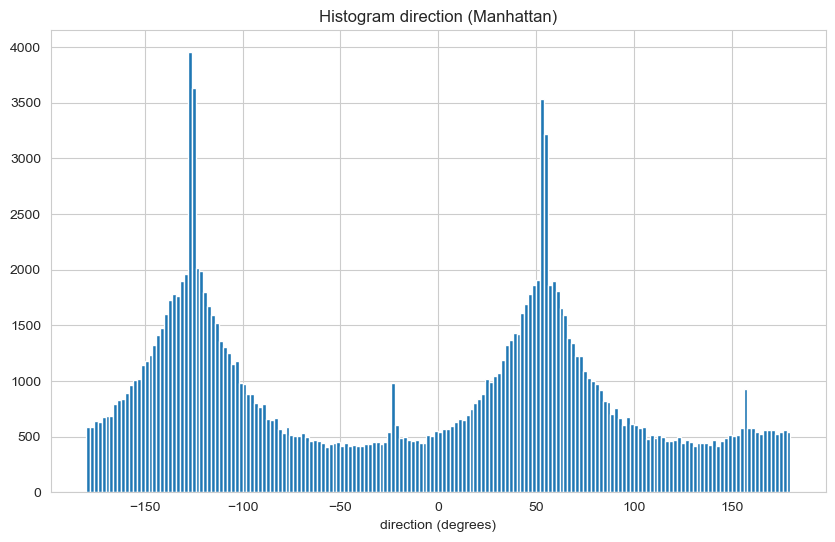

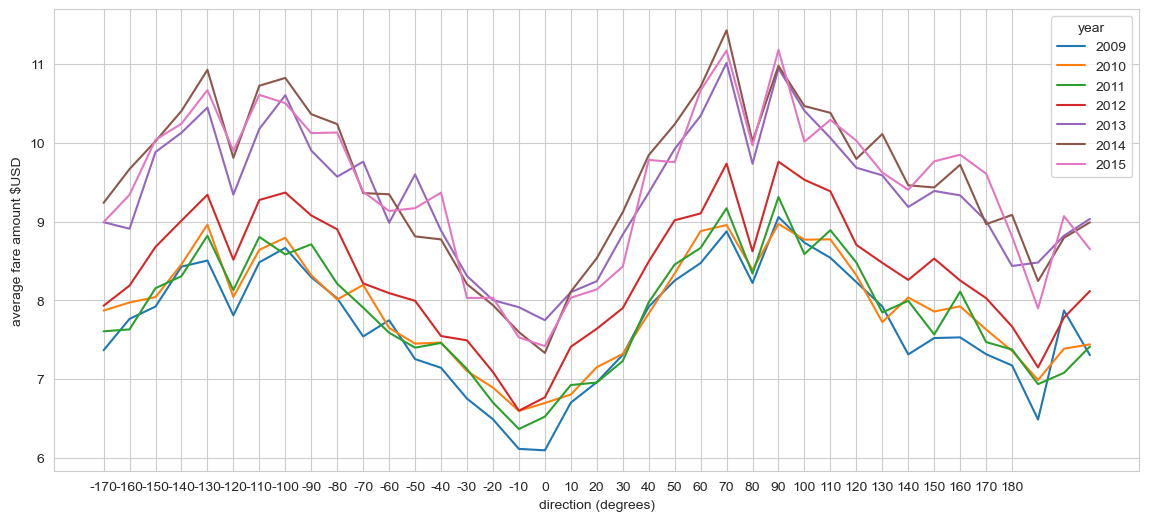

In [86]:
# plot histogram of directions
plt.figure(figsize=(10,6))
df_train[idx_manhattan].direction.hist(bins=180)
plt.xlabel('direction (degrees)')
plt.title('Histogram direction (Manhattan)')

# plot direction vs average fare amount
fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(df_train[idx_manhattan]['direction'], np.linspace(-180, 180, 40))

df_train[idx_manhattan].pivot_table('fare_amount', index=[direc], columns='year', aggfunc='mean').plot(ax=ax)

plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');

### Fare varies with pickup location

In [87]:
# add new column to dataframe with distance in mile
df_train['distance_to_center'] = distance(nyc[1], nyc[0], df_train["pickup_latitude"], df_train["pickup_longitude"])

C:\Users\shrey\AppData\Local\Temp\ipykernel_12944\1226797064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['distance_to_center'] = distance(nyc[1], nyc[0], df_train["pickup_latitude"], df_train["pickup_longitude"])


In [88]:
df_train.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  year  weekday  hour  distance_miles  fare_per_mile  \
0                1  2009        0    17        0.640487       7.025903   
1                1  2010        1    16        5.250670       3.218637   
2                2  2011        3     0        0.863411       6.601723   
3                1  2012        5     4        1.739386       4.426850   
4                1  2010        1     7        1.242218       4.266560   

   delta_lon  delta_lat   direction  distance_to_center  
0  -0.002701   0.009041  106.633523            8.502079  
1  -0.036780  -0.070701 -117.484306            0.543185  
2   0.008504   0.010708   51.544361            3.482099  
3   0.004437  -0.024949  -79.915791            1.654108  
4  -0.011440  -0.015754 -125.985832            4.225834

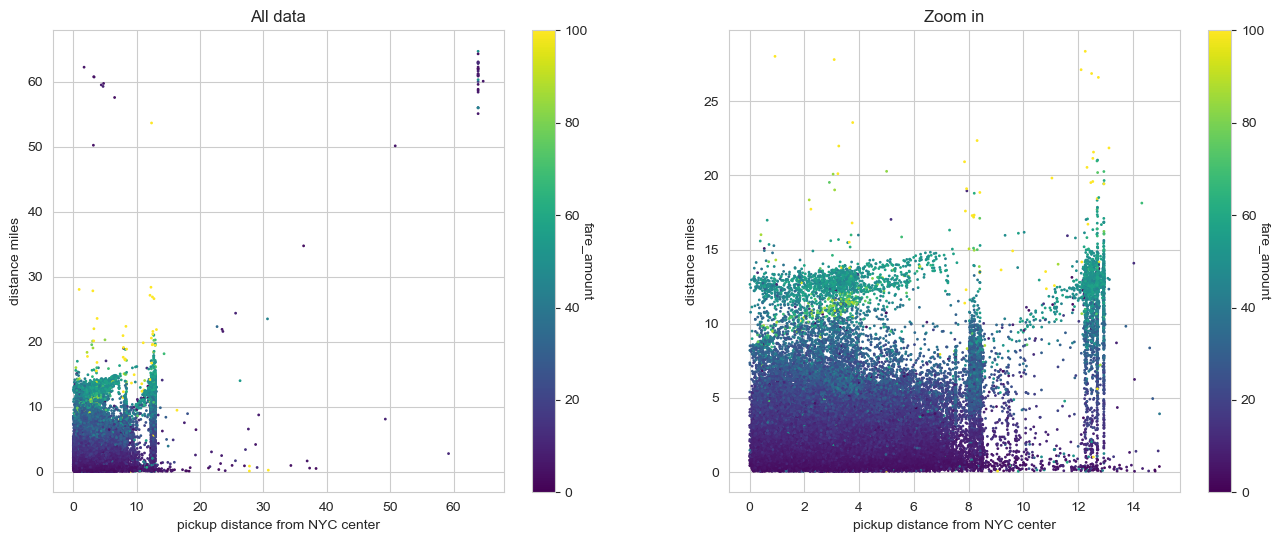

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(df_train["distance_to_center"], df_train["distance_miles"], c=np.clip(df_train["fare_amount"], 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)

axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')

cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)


idx = (df_train["distance_to_center"] < 15) & (df_train["distance_miles"] < 35)
im = axs[1].scatter(df_train[idx]["distance_to_center"], df_train[idx]["distance_miles"], 
                     c=np.clip(df_train[idx]["fare_amount"], 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

#### There is a lot of 'green' dots, which is about 50 to 60 fare amount near 13 miles distance of NYC center of distrance of trip. This could be due to trips from/to JFK airport

### Baseline Model and Submission

In [90]:
# add new column to dataframe with distance in km
df_test['distance_miles'] = distance(df_test["pickup_latitude"], df_test["pickup_longitude"], 
                                     df_test["dropoff_latitude"], df_test["dropoff_longitude"])
df_test['distance_to_center'] = distance(nyc[1], nyc[0], df_test["dropoff_latitude"], df_test["dropoff_longitude"])
df_test['hour'] = df_test["pickup_datetime"].apply(lambda t: pd.to_datetime(t).hour)
df_test['year'] = df_test["pickup_datetime"].apply(lambda t: pd.to_datetime(t).year)
df_test['weekday'] = df_test["pickup_datetime"].apply(lambda t: pd.to_datetime(t).weekday())

In [91]:
df_train.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  year  weekday  hour  distance_miles  fare_per_mile  \
0                1  2009        0    17        0.640487       7.025903   
1                1  2010        1    16        5.250670       3.218637   
2                2  2011        3     0        0.863411       6.601723   
3                1  2012        5     4        1.739386       4.426850   
4                1  2010        1     7        1.242218       4.266560   

   delta_lon  delta_lat   direction  distance_to_center  
0  -0.002701   0.009041  106.633523            8.502079  
1  -0.036780  -0.070701 -117.484306            0.543185  
2   0.008504   0.010708   51.544361            3.482099  
3   0.004437  -0.024949  -79.915791            1.654108  
4  -0.011440  -0.015754 -125.985832            4.225834

In [92]:
df_test.head()

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.763805         -73.981430         40.743835                1   
1        40.719383         -73.998886         40.739201                1   
2        40.751260         -73.979654         40.746139                1   
3        40.767807         -73.990448         40.751635                1   
4        40.789775         -73.988565         40.744427                1   

   distance_miles  distance_to_center  hour  year  weekday  
0        1.443607            2.431036    13  2015        1  
1        1.507044            1.773728    13  2015        1  
2        0.384398            2.615229    11  2011        5  
3        1.218529            2.720018    21  2012        5  
4        3.347514            2.289611    21  2012        5

In [93]:
# define dataset
# select points 15 miles near NYC center and remove zero passenger datapoints
idx = (df_train["distance_to_center"] < 15) & (df_train["passenger_count"] != 0)

features = ['year', 'hour', 'distance_miles', 'passenger_count','weekday','distance_to_center']

X = df_train[idx][features].values
y = df_train[idx]['fare_amount'].values

In [94]:
print(X.shape, y.shape)

(191672, 6) (191672,)


In [95]:
# define some handy analysis support function
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

In [96]:
# create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

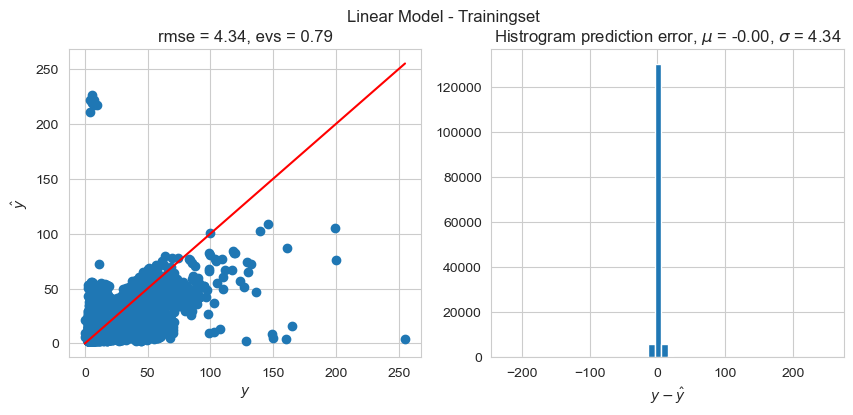

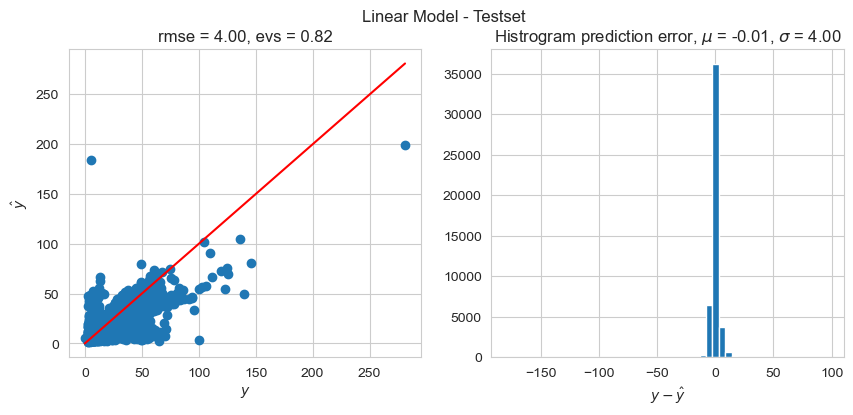

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))

model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)

plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Model - Testset')

Generate Kaggle Submission

In [98]:
# define dataset
XTEST = df_test[features].values

In [101]:
# y_pred_final = model_lin.predict(XTEST)

# submission = pd.DataFrame(
#     {
#         'key': df_test["key"], 
#         'fare_amount': y_pred_final
#     },
#     columns = ['key', 'fare_amount'])
# submission.to_csv(r'E:\Coding Nest\DataScience_01Mar2020\CourseMaterials\NewYorkTaxiFarePrediction\new-york-city-taxi-fare-prediction\submission.csv', index=False)

import os
import pandas as pd

# Your data preparation code here
y_pred_final = model_lin.predict(XTEST)
submission = pd.DataFrame(
    {
        'key': df_test["key"], 
        'fare_amount': y_pred_final
    },
    columns=['key', 'fare_amount']
)

# Define the directory path
directory = r'E:\Coding Nest\DataScience_01Mar2020\CourseMaterials\NewYorkTaxiFarePrediction\new-york-city-taxi-fare-prediction'

# Check if the directory exists, if not, create it
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the full path to save the file
file_path = os.path.join(directory, 'submission.csv')

# Save the DataFrame to a CSV file
submission.to_csv(file_path, index=False)

print(f"File saved successfully at {file_path}")


File saved successfully at E:\Coding Nest\DataScience_01Mar2020\CourseMaterials\NewYorkTaxiFarePrediction\new-york-city-taxi-fare-prediction\submission.csv


In [102]:
submission.head()

key  fare_amount
0  2015-01-27 13:08:24.0000002    10.553528
1  2015-01-27 13:08:24.0000003    10.682266
2  2011-10-08 11:53:44.0000002     4.467401
3  2012-12-01 21:12:12.0000002     8.103041
4  2012-12-01 21:12:12.0000003    15.735901